## Making videos in Nocturne

This notebook shows how to get started with rendering scenarios in Nocturne.

In [18]:
# Dependencies
import pandas as pd
import numpy as np
from IPython.display import HTML, Image
from pathlib import Path
from pyvirtualdisplay import Display
import imageio
import matplotlib.pyplot as plt

from utils.config import load_config_nb
from nocturne.envs.base_env import BaseEnv

### Helper functions

In [19]:
def create_video(image_array, filename, *, fps=4, loop=500):
    with imageio.get_writer(filename, duration=1_000 / fps, loop=loop) as writer:
        for img in image_array:
            img = np.moveaxis(img, [0, 1, 2], [2, 0, 1])
            writer.append_data(img)


def display_gif(filename, width=500, height=500):
    display(
        Image(
            data=open(filename, "rb").read(), format="gif", width=width, height=height
        )
    )

### Configurations

In [23]:
# Set the path to where you want to save the videos
VIDEO_PATH = '../evaluation/videos'

# Load the environment configuration
env_config = load_config_nb("env_config")
# Because we're in a notebook, we need to change the path to the data
env_config.data_path = f"../{env_config.data_path}"

# How slow/fast the video should be
FPS = 4

### Rendering Options in Python

To render the environment, you can use the following functions:

- `env.scenario.getImage()`: Displays the main scenario image.
- `env.scenario.getConeImage()`: Shows the overlay image with cones.
- `env.scenario.getFeaturesImage()`: Provides an overlay image highlighting features.

First, make sure ensure to reset the environment to a random new scenario or a specific filename:

```python
env.reset(filename='your-scenario')
```

In [ ]:
# Make environment
env = BaseEnv(env_config)

In [27]:
# Reset the environment
obs_dict = env.reset(filename=None)
scene_name = str(env.file)
frames = []
action_dict = {}

for time_step in range(90):
    
    if time_step % 2 == 0:
        with Display(backend="xvfb") as disp:
            # Render the scene
            render_scene = env.scenario.getImage(
                img_width=1600,
                img_height=1600,
                draw_target_positions=True,
                padding=50.0,
                source=env.controlled_vehicles[0],
                view_width=120,
                view_height=120,
                rotate_with_source=True,
            )
            # Append to frames
            frames.append(render_scene.T)

    # Step
    obs_dict, rew_dict, done_dict, info_dict = env.step(action_dict)
    
    if done_dict['__all__']:
        break

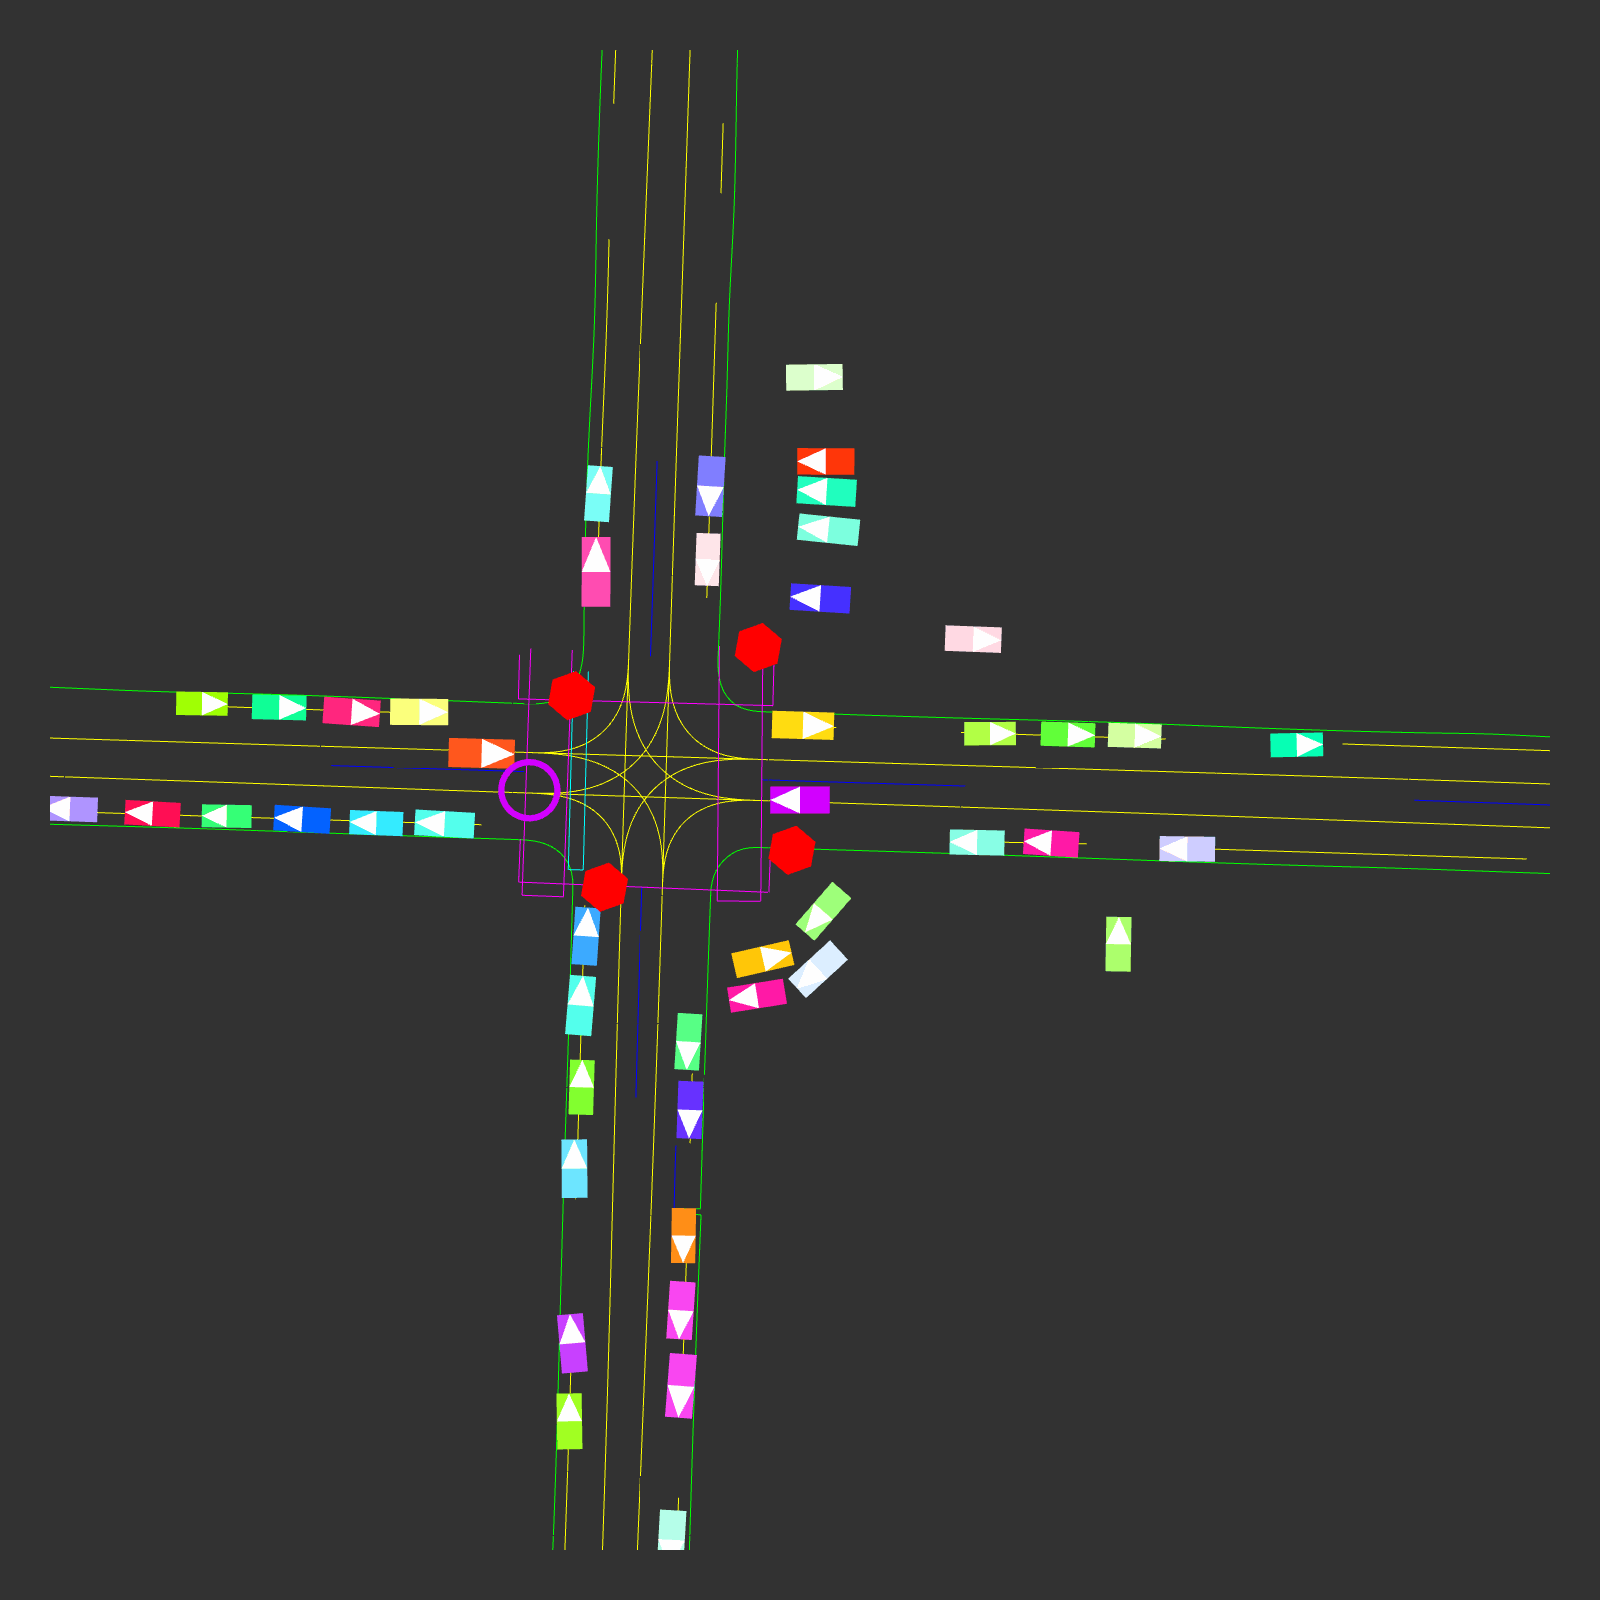

In [28]:
Path(f"{VIDEO_PATH}/{scene_name}").parent.mkdir(parents=True, exist_ok=True)
create_video(frames, f"{VIDEO_PATH}/{scene_name}.gif", fps=FPS)
display(HTML(f"<h3>{scene_name}</h3>"))
display_gif(f"{VIDEO_PATH}/{scene_name}.gif")